In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C://Users//User//Downloads//archive (9)//heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
dfq= df[['age', 'sex', 'cp', 'num']]
dfq

,age,sex,cp,num
0,63,Male,typical angina,0
1,67,Male,asymptomatic,2
2,67,Male,asymptomatic,1
3,37,Male,non-anginal,0
4,41,Female,atypical angina,0
...,...,...,...,...
915,54,Female,asymptomatic,1
916,62,Male,typical angina,0
917,55,Male,asymptomatic,2
918,58,Male,asymptomatic,0


In [7]:
dfq['sex']= dfq['sex'].str.lower()
dfq['cp']= dfq['cp'].str.lower()

C:\Users\User\AppData\Local\Temp\ipykernel_8196\447442783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['sex']= dfq['sex'].str.lower()
C:\Users\User\AppData\Local\Temp\ipykernel_8196\447442783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['cp']= dfq['cp'].str.lower()


(array([ 12.,  37.,  86., 104., 149., 201., 176., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

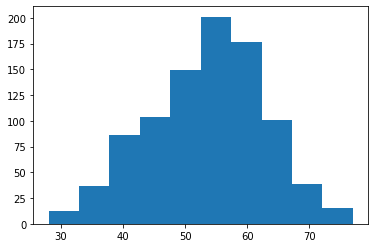

In [8]:
plt.hist(dfq['age'])

In [9]:
def generalize_age(age):
    if age <= 40:
        return '0-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '61+'

dfq['age_group']= dfq['age'].apply(generalize_age)

C:\Users\User\AppData\Local\Temp\ipykernel_8196\2974565684.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['age_group']= dfq['age'].apply(generalize_age)


In [10]:
def generalize_cp(cp):
    if 'angina' in cp:
        return 'angina'
    elif 'non-anginal' in cp:
        return 'non-anginal'
    else:
        return 'other'

dfq['cp_generalized'] = dfq['cp'].apply(generalize_cp)

C:\Users\User\AppData\Local\Temp\ipykernel_8196\2148501300.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['cp_generalized'] = dfq['cp'].apply(generalize_cp)


In [11]:
def generalize_num(num):
    if num== 0:
        return 0
    else:
        return 1
    
dfq['num_gen']= dfq['num'].apply(generalize_num)

C:\Users\User\AppData\Local\Temp\ipykernel_8196\97782942.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['num_gen']= dfq['num'].apply(generalize_num)


In [12]:
dfq

,age,sex,cp,num,age_group,cp_generalized,num_gen
0,63,male,typical angina,0,61+,angina,0
1,67,male,asymptomatic,2,61+,other,1
2,67,male,asymptomatic,1,61+,other,1
3,37,male,non-anginal,0,0-40,angina,0
4,41,female,atypical angina,0,41-50,angina,0
...,...,...,...,...,...,...,...
915,54,female,asymptomatic,1,51-60,other,1
916,62,male,typical angina,0,61+,angina,0
917,55,male,asymptomatic,2,51-60,other,1
918,58,male,asymptomatic,0,51-60,other,0


In [13]:
dfq['QID']= dfq['age_group']+ '_'+ dfq['cp_generalized']+ '_'+ dfq['sex']
dfq

C:\Users\User\AppData\Local\Temp\ipykernel_8196\3120331477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['QID']= dfq['age_group']+ '_'+ dfq['cp_generalized']+ '_'+ dfq['sex']


,age,sex,cp,num,age_group,cp_generalized,num_gen,QID
0,63,male,typical angina,0,61+,angina,0,61+_angina_male
1,67,male,asymptomatic,2,61+,other,1,61+_other_male
2,67,male,asymptomatic,1,61+,other,1,61+_other_male
3,37,male,non-anginal,0,0-40,angina,0,0-40_angina_male
4,41,female,atypical angina,0,41-50,angina,0,41-50_angina_female
...,...,...,...,...,...,...,...,...
915,54,female,asymptomatic,1,51-60,other,1,51-60_other_female
916,62,male,typical angina,0,61+,angina,0,61+_angina_male
917,55,male,asymptomatic,2,51-60,other,1,51-60_other_male
918,58,male,asymptomatic,0,51-60,other,0,51-60_other_male


In [14]:
qid_count= dfq['QID'].value_counts().reset_index()
qid_count.columns= ['QID', 'QID_Count']
qid_count

,QID,QID_Count
0,51-60_other_male,189
1,51-60_angina_male,123
2,61+_other_male,118
3,41-50_other_male,93
4,41-50_angina_male,72
5,61+_angina_male,58
6,0-40_angina_male,47
7,51-60_angina_female,46
8,41-50_angina_female,43
9,0-40_other_male,26


In [15]:
dfq= dfq.merge(qid_count, on= 'QID', how= 'left')
dfq

,age,sex,cp,num,age_group,cp_generalized,num_gen,QID,QID_Count
0,63,male,typical angina,0,61+,angina,0,61+_angina_male,58
1,67,male,asymptomatic,2,61+,other,1,61+_other_male,118
2,67,male,asymptomatic,1,61+,other,1,61+_other_male,118
3,37,male,non-anginal,0,0-40,angina,0,0-40_angina_male,47
4,41,female,atypical angina,0,41-50,angina,0,41-50_angina_female,43
...,...,...,...,...,...,...,...,...,...
915,54,female,asymptomatic,1,51-60,other,1,51-60_other_female,24
916,62,male,typical angina,0,61+,angina,0,61+_angina_male,58
917,55,male,asymptomatic,2,51-60,other,1,51-60_other_male,189
918,58,male,asymptomatic,0,51-60,other,0,51-60_other_male,189


In [16]:
dfq['QID_Count'].describe()

count    920.000000
mean      98.786957
std       57.051685
min        7.000000
25%       47.000000
50%       93.000000
75%      123.000000
max      189.000000
Name: QID_Count, dtype: float64

In [17]:
dfq['QID_Count'].min()

7

In [18]:
l_diversity= dfq.groupby('QID')['num_gen'].nunique().reset_index()
l_diversity.columns = ['QID', 'l_diversity']
dfq = dfq.merge(l_diversity, on='QID', how='left')

In [19]:
dfq

,age,sex,cp,num,age_group,cp_generalized,num_gen,QID,QID_Count,l_diversity
0,63,male,typical angina,0,61+,angina,0,61+_angina_male,58,2
1,67,male,asymptomatic,2,61+,other,1,61+_other_male,118,2
2,67,male,asymptomatic,1,61+,other,1,61+_other_male,118,2
3,37,male,non-anginal,0,0-40,angina,0,0-40_angina_male,47,2
4,41,female,atypical angina,0,41-50,angina,0,41-50_angina_female,43,2
...,...,...,...,...,...,...,...,...,...,...
915,54,female,asymptomatic,1,51-60,other,1,51-60_other_female,24,2
916,62,male,typical angina,0,61+,angina,0,61+_angina_male,58,2
917,55,male,asymptomatic,2,51-60,other,1,51-60_other_male,189,2
918,58,male,asymptomatic,0,51-60,other,0,51-60_other_male,189,2


In [20]:
dfq['l_diversity'].value_counts().sort_index()

1     13
2    907
Name: l_diversity, dtype: int64

In [21]:
dfq[dfq['l_diversity']==1]

,age,sex,cp,num,age_group,cp_generalized,num_gen,QID,QID_Count,l_diversity
210,37,female,non-anginal,0,0-40,angina,0,0-40_angina_female,13,1
222,39,female,non-anginal,0,0-40,angina,0,0-40_angina_female,13,1
225,34,female,atypical angina,0,0-40,angina,0,0-40_angina_female,13,1
277,39,female,non-anginal,0,0-40,angina,0,0-40_angina_female,13,1
306,30,female,typical angina,0,0-40,angina,0,0-40_angina_female,13,1
307,31,female,atypical angina,0,0-40,angina,0,0-40_angina_female,13,1
308,32,female,atypical angina,0,0-40,angina,0,0-40_angina_female,13,1
312,34,female,atypical angina,0,0-40,angina,0,0-40_angina_female,13,1
315,35,female,typical angina,0,0-40,angina,0,0-40_angina_female,13,1
323,37,female,atypical angina,0,0-40,angina,0,0-40_angina_female,13,1


In [24]:
dfq= dfq[dfq['l_diversity'] > 1]
dfq

,age,sex,cp,num,age_group,cp_generalized,num_gen,QID,QID_Count,l_diversity
0,63,male,typical angina,0,61+,angina,0,61+_angina_male,58,2
1,67,male,asymptomatic,2,61+,other,1,61+_other_male,118,2
2,67,male,asymptomatic,1,61+,other,1,61+_other_male,118,2
3,37,male,non-anginal,0,0-40,angina,0,0-40_angina_male,47,2
4,41,female,atypical angina,0,41-50,angina,0,41-50_angina_female,43,2
...,...,...,...,...,...,...,...,...,...,...
915,54,female,asymptomatic,1,51-60,other,1,51-60_other_female,24,2
916,62,male,typical angina,0,61+,angina,0,61+_angina_male,58,2
917,55,male,asymptomatic,2,51-60,other,1,51-60_other_male,189,2
918,58,male,asymptomatic,0,51-60,other,0,51-60_other_male,189,2


In [26]:
overall_dist= dfq['num_gen'].value_counts(normalize=True).reset_index()
overall_dist.columns= ['num_gen', 'overall_freq']

In [27]:
overall_dist

,num_gen,overall_freq
0,1,0.561191
1,0,0.438809


In [28]:
group_dist= (
    dfq.groupby(['QID', 'num_gen'])
    .size()
    .groupby(level =0)
    .apply(lambda x: x / x.sum())
    .reset_index()
)
group_dist.columns= ['QID', 'num_gen', 'group_freq']

In [29]:
group_dist

,QID,num_gen,group_freq
0,0-40_angina_male,0,0.872340
1,0-40_angina_male,1,0.127660
2,0-40_other_female,0,0.428571
3,0-40_other_female,1,0.571429
4,0-40_other_male,0,0.153846
5,0-40_other_male,1,0.846154
6,41-50_angina_female,0,0.930233
7,41-50_angina_female,1,0.069767
8,41-50_angina_male,0,0.750000
9,41-50_angina_male,1,0.250000


In [30]:
t_closeness= group_dist.merge(overall_dist, on= 'num_gen')
t_closeness

,QID,num_gen,group_freq,overall_freq
0,0-40_angina_male,0,0.872340,0.438809
1,0-40_other_female,0,0.428571,0.438809
2,0-40_other_male,0,0.153846,0.438809
3,41-50_angina_female,0,0.930233,0.438809
4,41-50_angina_male,0,0.750000,0.438809
5,41-50_other_female,0,0.750000,0.438809
6,41-50_other_male,0,0.268817,0.438809
7,51-60_angina_female,0,0.891304,0.438809
8,51-60_angina_male,0,0.609756,0.438809
9,51-60_other_female,0,0.375000,0.438809


In [31]:
t_closeness['abs_diff']= abs(t_closeness['group_freq'] - t_closeness['overall_freq'])

In [32]:
t_scores = t_closeness.groupby('QID')['abs_diff'].sum().reset_index()
t_scores.columns = ['QID', 't_closeness']

In [33]:
t_scores

,QID,t_closeness
0,0-40_angina_male,0.867062
1,0-40_other_female,0.020476
2,0-40_other_male,0.569926
3,41-50_angina_female,0.982847
4,41-50_angina_male,0.622381
5,41-50_other_female,0.622381
6,41-50_other_male,0.339984
7,51-60_angina_female,0.904990
8,51-60_angina_male,0.341894
9,51-60_other_female,0.127619


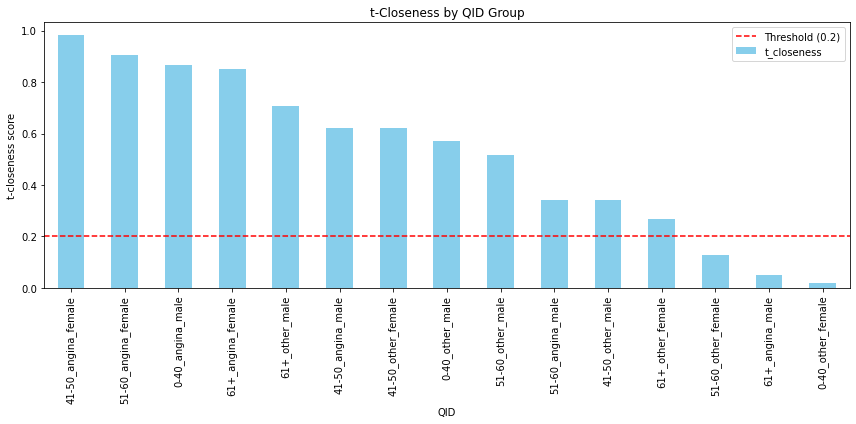

In [34]:
t_scores.sort_values('t_closeness', ascending=False).plot.bar(x='QID', y='t_closeness', figsize=(12,6), color='skyblue')
plt.axhline(y=0.2, color='red', linestyle='--', label='Threshold (0.2)')
plt.title('t-Closeness by QID Group')
plt.ylabel('t-closeness score')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
risky_qids= t_scores[t_scores['t_closeness'] > 0.4]['QID']
dfq_safe= dfq[~dfq['QID'].isin(risky_qids)]
dfq_safe

,age,sex,cp,num,age_group,cp_generalized,num_gen,QID,QID_Count,l_diversity
0,63,male,typical angina,0,61+,angina,0,61+_angina_male,58,2
5,56,male,atypical angina,0,51-60,angina,0,51-60_angina_male,123,2
6,62,female,asymptomatic,3,61+,other,1,61+_other_female,23,2
7,57,female,asymptomatic,0,51-60,other,0,51-60_other_female,24,2
12,56,male,non-anginal,2,51-60,angina,1,51-60_angina_male,123,2
...,...,...,...,...,...,...,...,...,...,...
910,51,female,asymptomatic,0,51-60,other,0,51-60_other_female,24,2
914,46,male,asymptomatic,2,41-50,other,1,41-50_other_male,93,2
915,54,female,asymptomatic,1,51-60,other,1,51-60_other_female,24,2
916,62,male,typical angina,0,61+,angina,0,61+_angina_male,58,2


In [36]:
risky_qids

0        0-40_angina_male
2         0-40_other_male
3     41-50_angina_female
4       41-50_angina_male
5      41-50_other_female
7     51-60_angina_female
10       51-60_other_male
11      61+_angina_female
14         61+_other_male
Name: QID, dtype: object